In [3]:
# !wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet

In [4]:
# !wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

In [5]:
import pandas as pd

In [ ]:
df_jan = pd.read_parquet("./data/yellow_tripdata_2023-01.parquet")

In [7]:
# Read the data for January. How many columns are there?
df_jan.shape

(3066766, 19)

In [8]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [16]:
# Now let's compute the duration variable. It should contain the duration of a ride in minutes.
df_jan['duration'] = df_jan['tpep_dropoff_datetime'] - df_jan['tpep_pickup_datetime']


In [18]:
df_jan['duration'] = df_jan['duration'].apply(lambda x: x.total_seconds() / 60)

In [19]:
df_jan['duration'].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [22]:
df_jan.shape

(3066766, 20)

In [23]:
df_jan_no = df_jan[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60)]

In [27]:
# What fraction of the records left after you dropped the outliers?
df_jan_no.shape[0] / df_jan.shape[0]

0.9812202822125979

In [28]:
df_jan_no.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [29]:
categorical_cols = ['PULocationID', 'DOLocationID']

In [30]:
df_jan_no[categorical_cols]

,PULocationID,DOLocationID
0,161,141
1,43,237
2,48,238
3,138,7
4,107,79
...,...,...
3066761,107,48
3066762,112,75
3066763,114,239
3066764,230,79


In [31]:
df_jan_no[categorical_cols].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [34]:
df_jan_no[categorical_cols] = df_jan_no[categorical_cols].astype(str)

/tmp/ipykernel_31489/847952883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan_no[categorical_cols] = df_jan_no[categorical_cols].astype(str)


In [35]:
df_jan_no[categorical_cols].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [36]:
from sklearn.feature_extraction import DictVectorizer

In [37]:
dv = DictVectorizer()

In [38]:
numerical_cols = ['trip_distance']

In [42]:
train_dicts = df_jan_no[categorical_cols + numerical_cols].to_dict(orient='records')

In [43]:
X_train = dv.fit_transform(train_dicts)

In [45]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9027519 stored elements and shape (3009173, 516)>

In [47]:
#training the model
target = 'duration'
y_train = df_jan_no[target].values

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(X_train)

In [52]:
import seaborn as sns

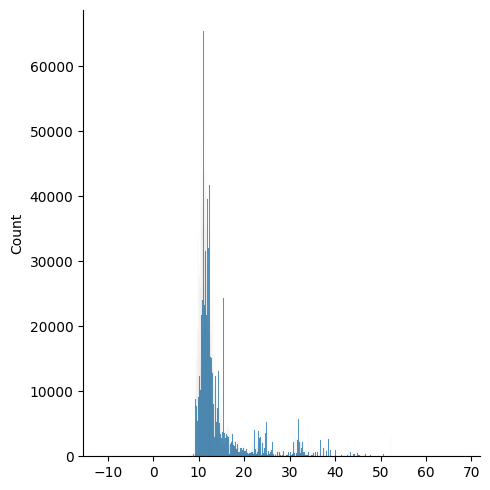

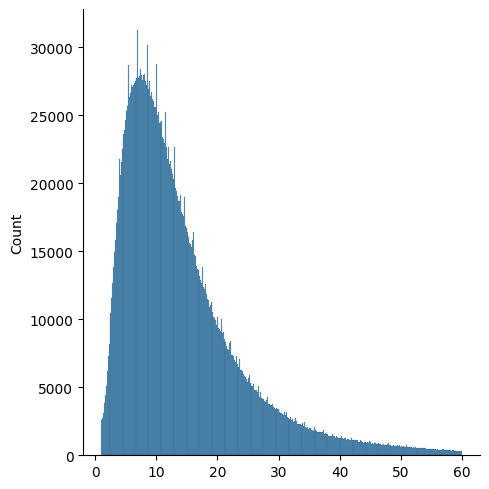

In [54]:
sns.displot(y_pred, label = 'prediction')
sns.displot(y_train, label = 'actual')

In [58]:
from sklearn.metrics import root_mean_squared_error

In [59]:
root_mean_squared_error(y_train, y_pred)

7.65839726314459

In [60]:
df_val = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')

In [61]:
val_dicts = df_val[categorical_cols + numerical_cols].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [63]:
df_val['duration'] = df_val['tpep_dropoff_datetime'] - df_val['tpep_pickup_datetime']
df_val['duration'] = df_val['duration'].apply(lambda x: x.total_seconds() / 60)

In [64]:
y_val = df_val[target].values

In [65]:
y_pred_val = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred_val)

43.24384262013034

In [67]:
# saving the model
import pickle

with open('./models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)